<a href="https://colab.research.google.com/github/Ksenia-90/NN/blob/lesson_2/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
!pip install tensorflow mnist matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Загрузка данных

In [52]:
import mnist

# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


Визуализируем данные

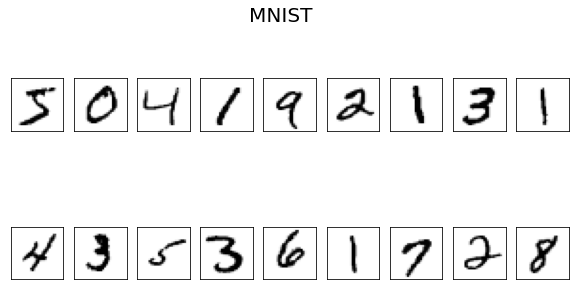

In [53]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 9, figsize=(10, 5))
fig.suptitle('MNIST', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(train_images[n], cmap='Greys')
    n += 1

In [54]:
28*28

784

In [55]:
import numpy as np

In [56]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


# Создание модели

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

##Разное количество слоев (2,5,10,15) c одинаковым количеством нейронов 256

In [58]:
model_2 = Sequential([
      Dense(256, activation='relu', input_shape=(784,)), 
      Dense(10, activation='softmax')
  ])

model_5 = Sequential([
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(10, activation='softmax')
  ]) 

model_10 = Sequential([
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(10, activation='softmax')
  ])

model_15l = Sequential([
      Dense(256, activation='relu', input_shape=(784,)),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dense(10, activation='softmax')
  ])

In [59]:
from tensorflow.keras.utils import to_categorical

In [60]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [61]:
res = []
level = [2, 5, 10, 15]
i = 0
for model in (model_2, model_5, model_10, model_15):

  result = {}

  model.summary()

  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  model.fit(
      train_images,
      to_categorical(train_labels),
      epochs=5,
      batch_size=32, 
      validation_split=0.2,
      verbose=0
  )

  result_train = model.evaluate(train_images, to_categorical(train_labels), verbose=0)
  result_test = model.evaluate(test_images, to_categorical(test_labels), verbose=0)

  result['n_layers'] = level[i]
  i += 1
  result['acc_train'] = np.round(result_train[1], 4)
  result['acc_test'] = np.round(result_test[1], 4)

  res.append(result)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_149 (Dense)           (None, 256)               200960    
                                                                 
 dense_150 (Dense)           (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_151 (Dense)           (None, 256)               200960    
                                                                 
 dense_152 (Dense)           (None, 256)               65792     
                                                                 
 dense_153 (Dense)      

In [62]:
from pprint import pprint
pprint(res)

[{'acc_test': 0.9712, 'acc_train': 0.9788, 'n_layers': 2},
 {'acc_test': 0.9645, 'acc_train': 0.9735, 'n_layers': 5},
 {'acc_test': 0.96, 'acc_train': 0.9672, 'n_layers': 10},
 {'acc_test': 0.9646, 'acc_train': 0.969, 'n_layers': 15}]


In [63]:
model_2 = Sequential([
      Dense(256, activation='relu', input_shape=(784,)), 
      Dense(10, activation='softmax')
  ])

model_5 = Sequential([
      Dense(200, activation='relu', input_shape=(784,)),
      Dense(200, activation='relu'),
      Dense(200, activation='relu'),
      Dense(200, activation='relu'),
      Dense(10, activation='softmax')
  ]) 

model_10 = Sequential([
      Dense(152, activation='relu', input_shape=(784,)),
      Dense(152, activation='relu'),
      Dense(152, activation='relu'),
      Dense(152, activation='relu'),
      Dense(10, activation='softmax')
  ]) 

model_15= Sequential([
      Dense(108, activation='relu', input_shape=(784,)),
      Dense(108, activation='relu'),
      Dense(108, activation='relu'),
      Dense(108, activation='relu'),
      Dense(108, activation='relu'),
      Dense(108, activation='relu'),
      Dense(108, activation='relu'),
      Dense(108, activation='relu'),
      Dense(108, activation='relu'),
      Dense(108, activation='relu'),
      Dense(108, activation='relu'),
      Dense(108, activation='relu'),
      Dense(108, activation='relu'),
      Dense(108, activation='relu'),
      Dense(10, activation='softmax')
  ])

In [64]:
res = []
level = [2, 5, 10, 15]
i = 0
for model in (model_2, model_5, model_10, model_15):

  result = {}

  model.summary()

  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  model.fit(
      train_images,
      to_categorical(train_labels),
      epochs=5,
      batch_size=32, 
      validation_split=0.2,
      verbose=0
  )

  result_train = model.evaluate(train_images, to_categorical(train_labels), verbose=0)
  result_test = model.evaluate(test_images, to_categorical(test_labels), verbose=0)

  result['n_layers'] = level[i]
  i += 1
  result['acc_train'] = np.round(result_train[1], 4)
  result['acc_test'] = np.round(result_test[1], 4)

  res.append(result)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_181 (Dense)           (None, 256)               200960    
                                                                 
 dense_182 (Dense)           (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_183 (Dense)           (None, 200)               157000    
                                                                 
 dense_184 (Dense)           (None, 200)               40200     
                                                                 
 dense_185 (Dense)      

In [65]:
from pprint import pprint
pprint(res)

[{'acc_test': 0.9716, 'acc_train': 0.9797, 'n_layers': 2},
 {'acc_test': 0.9701, 'acc_train': 0.9767, 'n_layers': 5},
 {'acc_test': 0.9685, 'acc_train': 0.9782, 'n_layers': 10},
 {'acc_test': 0.9501, 'acc_train': 0.9544, 'n_layers': 15}]


##Разные оптимизаторы

##SGD

In [66]:
res = []
level = [2, 5, 10, 15]
i = 0
for model in (model_2, model_5, model_10, model_15):

  result = {}

  model.summary()

  model.compile(
      optimizer='SGD',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  model.fit(
      train_images,
      to_categorical(train_labels),
      epochs=5,
      batch_size=32, 
      validation_split=0.2,
      verbose=0
  )

  result_train = model.evaluate(train_images, to_categorical(train_labels), verbose=0)
  result_test = model.evaluate(test_images, to_categorical(test_labels), verbose=0)

  result['n_layers'] = level[i]
  i += 1
  result['acc_train'] = np.round(result_train[1], 4)
  result['acc_test'] = np.round(result_test[1], 4)

  res.append(result)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_181 (Dense)           (None, 256)               200960    
                                                                 
 dense_182 (Dense)           (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_183 (Dense)           (None, 200)               157000    
                                                                 
 dense_184 (Dense)           (None, 200)               40200     
                                                                 
 dense_185 (Dense)      

In [ ]:
from pprint import pprint
pprint(res)

##RMSProp

In [ ]:
res = []
level = [2, 5, 10, 15]
i = 0
for model in (model_2, model_5, model_10, model_15):

  result = {}

  model.summary()

  model.compile(
      optimizer='RMSProp',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  model.fit(
      train_images,
      to_categorical(train_labels),
      epochs=5,
      batch_size=32, 
      validation_split=0.2,
      verbose=0
  )

  result_train = model.evaluate(train_images, to_categorical(train_labels), verbose=0)
  result_test = model.evaluate(test_images, to_categorical(test_labels), verbose=0)

  result['n_layers'] = level[i]
  i += 1
  result['acc_train'] = np.round(result_train[1], 4)
  result['acc_test'] = np.round(result_test[1], 4)

  res.append(result)

In [ ]:
from pprint import pprint
pprint(res)

##Выводы:
*на качество модели влияют:
1. функция активации
2. количество слоев
3. Количество нейронов